In [1]:
import numpy as np
import pandas as pd 
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('exams.csv')

In [11]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,high school,free/reduced,none,55,61,62
1,male,group D,some high school,standard,none,60,56,54
2,male,group C,some high school,standard,none,84,77,70
3,female,group C,associate's degree,free/reduced,none,49,62,59
4,female,group E,associate's degree,standard,none,100,100,100


In [ ]:
# Overall look at dataset
data.describe()

In [ ]:
# check for missing values

data.isnull().sum()

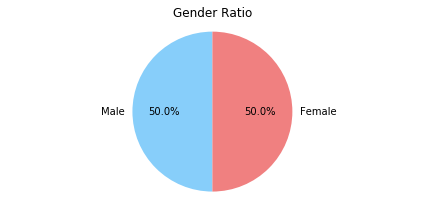

In [55]:
# ratio of male and female students

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
ax.set_title("Gender Ratio")

male = data[data.gender == 'male'].shape[0]
female = data[data.gender == 'female'].shape[0]

labels = 'Male', 'Female'
sizes= [male, female]
colors = ['lightskyblue', 'lightcoral']

plt.axis("equal")
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.tight_layout()
plt.show()

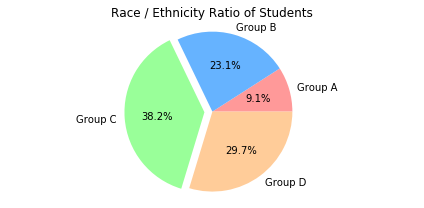

In [51]:
# ratio of each race/ethnicity group

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
ax.set_title("Race / Ethnicity Ratio of Students")

GA = data[data['race/ethnicity'] == 'group A'].shape[0]
GB = data[data['race/ethnicity'] == 'group B'].shape[0]
GC = data[data['race/ethnicity'] == 'group C'].shape[0]
GD = data[data['race/ethnicity'] == 'group D'].shape[0]

labels = 'Group A', 'Group B', 'Group C', 'Group D'
sizes = [GA, GB, GC, GD]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = (0, 0, 0.1, 0)

plt.axis("equal")
plt.pie(sizes, explode=explode, colors=colors, labels=labels, autopct='%1.1f%%')
plt.tight_layout()
plt.show()

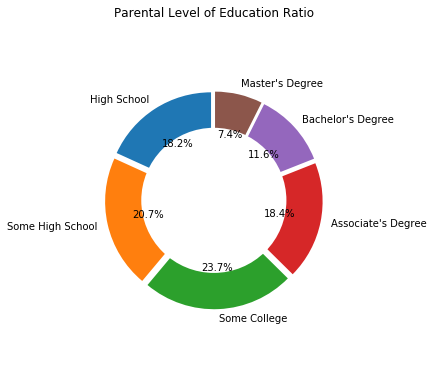

In [3]:
# ratio of students based on parental level of education 

fig, ax = plt.subplots(figsize=(6, 5.5), subplot_kw=dict(aspect="equal"))
ax.set_title("Parental Level of Education Ratio")

hs = data[data['parental level of education'] == 'high school'].shape[0]
shs = data[data['parental level of education'] == 'some high school'].shape[0]
sc = data[data['parental level of education'] == 'some college'].shape[0]
ad = data[data['parental level of education'] == 'associate\'s degree'].shape[0]
bd = data[data['parental level of education'] == 'bachelor\'s degree'].shape[0]
md = data[data['parental level of education'] == 'master\'s degree'].shape[0]

labels = 'High School', 'Some High School', 'Some College', 'Associate\'s Degree', 'Bachelor\'s Degree', 'Master\'s Degree'
sizes = [hs, shs, sc, ad, bd, md]
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05)

plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', startangle=90)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis("equal")
plt.tight_layout()
plt.show()

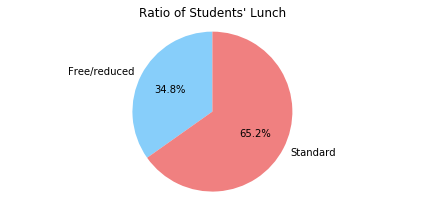

In [56]:
# ratio of students having free/reduced lunch and standard lunch

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
ax.set_title("Ratio of Students' Lunch")

free_reduced = data[data['lunch'] == 'free/reduced'].shape[0]
std = data[data['lunch'] == 'standard'].shape[0]

labels = 'Free/reduced', 'Standard'
sizes= [free_reduced, std]
colors = ['lightskyblue', 'lightcoral']

plt.axis("equal")
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', startangle=90)
plt.tight_layout()
plt.show()

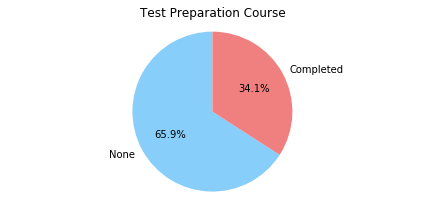

In [58]:
# ratio of students who took the test prep course and who didn't

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
ax.set_title("Test Preparation Course")

none = data[data['test preparation course'] == 'none'].shape[0]
completed = data[data['test preparation course'] == 'completed'].shape[0]

labels = 'None', 'Completed'
sizes= [none, completed]
colors = ['lightskyblue', 'lightcoral']

plt.axis("equal")
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', startangle=90)
plt.tight_layout()
plt.show()

In [ ]:
# exploring the data set, and also to see if each column affects 
# the target variables to a noticeable degree, comparing the scores to the mean. 

data.groupby(['gender']).mean()

In [ ]:
data.groupby(['race/ethnicity']).mean()

In [ ]:
data.groupby(['parental level of education']).mean()

In [ ]:
data.groupby(['lunch']).mean()

In [ ]:
data.groupby(['test preparation course']).mean()

In [ ]:
# calculating mutual information for target variables 

def calc_MI(X,Y,bins):

   c_XY = np.histogram2d(X[:,0],Y,bins)[0]
   c_X = np.histogram(X,bins)[0]
   c_Y = np.histogram(Y,bins)[0]

   H_X = shan_entropy(c_X)
   H_Y = shan_entropy(c_Y)
   H_XY = shan_entropy(c_XY)

   MI = H_X + H_Y - H_XY
   return MI

def shan_entropy(c):
    c_normalized = c / float(np.sum(c))
    c_normalized = c_normalized[np.nonzero(c_normalized)]
    H = -sum(c_normalized* np.log2(c_normalized))  
    return H

bins = 10

In [ ]:
# x = gender, y = math score

x = data['gender']
y = data['math score']

le = preprocessing.LabelEncoder()
le.fit(x)

x_1 = le.fit_transform(x) 
x_1 = x_1.reshape(-1, 1)

A = np.array(x_1)
n = A.shape[1]
matMI = np.zeros((n, n))

for ix in np.arange(n):
    for jx in np.arange(ix+1,n):
        matMI[ix,jx] = calc_MI(A[:,ix], A[:,jx], bins)
        
matMI = calc_MI(x_1, y, bins)
matMI


In [ ]:
# x = gender, y = reading score

y = data['reading score']

matMI = calc_MI(x_1, y, bins)
matMI

In [ ]:
# x = gender, y = writing score

y = data['writing score']
matMI = calc_MI(x_1, y, bins)
matMI

In [ ]:
# x = race/ethnicity, y = math score

x = data['race/ethnicity']
y = data['math score']

le = preprocessing.LabelEncoder()
le.fit(x)

x_2 = le.fit_transform(x) 
x_2 = x_2.reshape(-1, 1)

# since x changed, update A and the relevant variables

A = np.array(x_2)
n = A.shape[1]
matMI = np.zeros((n, n))

for ix in np.arange(n):
    for jx in np.arange(ix+1,n):
        matMI[ix,jx] = calc_MI(A[:,ix], A[:,jx], bins)

matMI = calc_MI(x_2, y, bins)
matMI

In [ ]:
# x = race/ethnicity, y = reading score

y = data['reading score']
matMI = calc_MI(x_2, y, bins)
matMI

In [ ]:
# x = race/ethnicity, y = writing score

y = data['writing score']
matMI = calc_MI(x_2, y, bins)
matMI

In [ ]:
# x = parental level of education, y = math score

x = data['parental level of education']
y = data['math score']

le = preprocessing.LabelEncoder()
le.fit(x)

x_3 = le.fit_transform(x) 
x_3 = x_3.reshape(-1, 1)

# since x changed, update A and the relevant variables

A = np.array(x_3)
n = A.shape[1]
matMI = np.zeros((n, n))

for ix in np.arange(n):
    for jx in np.arange(ix+1,n):
        matMI[ix,jx] = calc_MI(A[:,ix], A[:,jx], bins)
        
matMI = calc_MI(x_3, y, bins)
matMI

In [ ]:
# x = parental level of education, y = reading score

y = data['reading score']
matMI = calc_MI(x_3, y, bins)
matMI

In [ ]:
# x = parental level of education, y = writing score

y = data['writing score']
matMI = calc_MI(x_3, y, bins)
matMI

In [ ]:
# x = lunch, y = math score

x = data['lunch']
y = data['math score']

le = preprocessing.LabelEncoder()
le.fit(x)

x_4 = le.fit_transform(x) 
x_4 = x_4.reshape(-1, 1)

# since x changed, update A and the relevant variables

A = np.array(x_4)
n = A.shape[1]
matMI = np.zeros((n, n))

for ix in np.arange(n):
    for jx in np.arange(ix+1,n):
        matMI[ix,jx] = calc_MI(A[:,ix], A[:,jx], bins)

matMI = calc_MI(x_4, y, bins)
matMI

In [ ]:
# x = lunch, y = reading score

y = data['reading score']
matMI = calc_MI(x_4, y, bins)
matMI

In [ ]:
# x = lunch, y = writing score

y = data['writing score']
matMI = calc_MI(x_4, y, bins)
matMI

In [ ]:
# x = test preparation course, y = math score

x = data['test preparation course']
y = data['math score']

le = preprocessing.LabelEncoder()
le.fit(x)

x_5 = le.fit_transform(x) 
x_5 = x_5.reshape(-1, 1)

# since x changed, update A and the relevant variables

A = np.array(x_5)
n = A.shape[1]
matMI = np.zeros((n, n))

for ix in np.arange(n):
    for jx in np.arange(ix+1,n):
        matMI[ix,jx] = calc_MI(A[:,ix], A[:,jx], bins)

matMI = calc_MI(x_5, y, bins)
matMI

In [ ]:
# x = test preparation course, y = reading score

y = data['reading score']
matMI = calc_MI(x_5, y, bins)
matMI

In [ ]:
# x = test preparation course, y = writing score

y = data['writing score']
matMI = calc_MI(x_5, y, bins)
matMI

In [ ]:
data.dtypes